In [1]:
import numpy as np
import pandas as pd
from jump.collate import get_inchi_annotations
import seaborn as sns

/Users/jarevalo/mambaforge/envs/jump_labeler/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir = '/Users/jarevalo/projects/compound-annotator/outputs/'
annotations = get_inchi_annotations(output_dir)
annotations['link_id'] = annotations['target'] + '_' + annotations['inchikey']
crosstab = annotations.pivot_table(index='link_id', columns='rel_type', values='inchikey', aggfunc=len).fillna(0).astype(int)
cooc = crosstab.T.dot(crosstab)

In [3]:
n_cooc = cooc / np.diagonal(cooc)
m_edges = n_cooc.where(np.triu(np.ones(n_cooc.shape), k=1).astype(np.bool_))
m_edges = m_edges.melt(ignore_index=False).sort_values(by='value', ascending=False).dropna()
m_edges.index.name = 'source'
m_edges.columns = 'target', 'weight'
m_edges = m_edges.query('weight > 0').reset_index()
m_edges

,source,target,weight
0,DRUG_TARGET,negative modulator,1.000000
1,DPI,DRUG_TARGET,1.000000
2,DRUG_BINDING_GENE,"blocker,activator",1.000000
3,DPI,DRUG_CARRIER,1.000000
4,DRUG_ACTIVATION_GENE,"agonist,allosteric modulator",1.000000
...,...,...,...
532,inhibitory allosteric modulator,unknown,0.000027
533,INCREASES_DEGENERATION_CHidG,unknown,0.000027
534,DECREASES_DEGENERATION_CHddG,unknown,0.000027
535,DRUG_BINDINH_GENE,UPREGULATES_CHuG,0.000026


<Axes: xlabel='weight', ylabel='Count'>

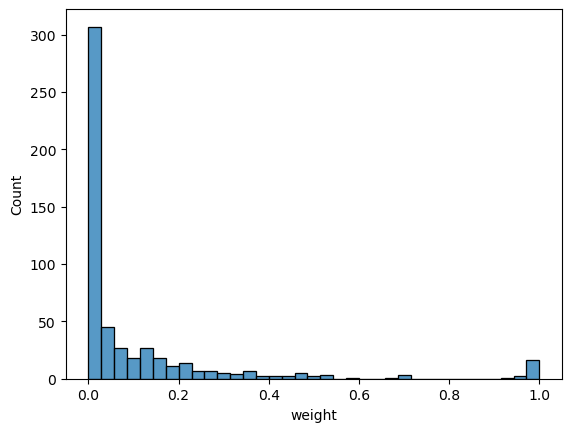

In [4]:
sns.histplot(m_edges, x='weight')

In [5]:
m_edges.groupby('source').weight.describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
ASSOCIATES_CHaG,37.0,0.065301,0.101553,0.001382,0.010485,0.021922,0.037063,0.375000
BINDS_CHbG,37.0,0.199835,0.207718,0.000997,0.042857,0.141316,0.284404,0.988299
CbG,36.0,0.179899,0.163596,0.000950,0.042560,0.134734,0.270092,0.541624
CdG,16.0,0.012826,0.043687,0.000076,0.000703,0.001224,0.002267,0.176354
CuG,21.0,0.009323,0.033843,0.000053,0.000343,0.001202,0.002610,0.156611
DECREASES_DEGENERATION_CHddG,14.0,0.000869,0.002984,0.000006,0.000042,0.000048,0.000115,0.011236
DOWNREGULATES_CHdG,28.0,0.058457,0.108467,0.000585,0.005856,0.013917,0.028205,0.458333
DPI,34.0,0.403360,0.377999,0.002428,0.126683,0.230245,0.707299,1.000000
DRUG_ACTIVATION_GENE,31.0,0.077211,0.182478,0.001850,0.006314,0.017535,0.051334,1.000000


In [6]:
m_edges.groupby('target').weight.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
BINDS_CHbG,1.0,0.037063,NaN,0.037063,0.037063,0.037063,0.037063,0.037063
CbG,2.0,0.512438,0.672968,0.036578,0.274508,0.512438,0.750368,0.988299
CdG,3.0,0.004874,0.006757,0.000950,0.000973,0.000997,0.006837,0.012677
CuG,3.0,0.006751,0.007575,0.002351,0.002378,0.002405,0.008951,0.015498
DECREASES_DEGENERATION_CHddG,3.0,0.166667,0.180422,0.062500,0.062500,0.062500,0.218750,0.375000
DOWNREGULATES_CHdG,6.0,0.046443,0.073841,0.000051,0.002156,0.002425,0.072108,0.176354
DPI,7.0,0.109893,0.174395,0.000040,0.000920,0.014754,0.192883,0.366853
DRUG_ACTIVATION_GENE,8.0,0.032195,0.027447,0.000161,0.003195,0.038304,0.054361,0.066801
DRUG_BINDACT_GENE,6.0,0.104677,0.083841,0.001691,0.036560,0.125951,0.148774,0.211327


In [7]:
annotations.query('rel_type=="DPI"').database.value_counts()

database
biokg    25010
Name: count, dtype: int64

In [8]:
cooc.to_csv('/Users/jarevalo/Downloads/cooc.csv', sep='\t')

## Co-ocurrence of annotations
<img src="cooc.svg">

# Merging annotations

In [9]:
mapper = {
    "DOWNREGULATES_CHdG": "downregulates",
    "CdG": "downregulates",
    "UPREGULATES_CHuG": "upregulates",
    "CuG": "upregulates",
    "DRUG_TARGET": "targets",
    "target": "targets",
    "DRUG_CARRIER": "carries",
    "carrier": "carries",
    "DRUG_ENZYME": "enzyme",
    "enzyme": "enzyme",
    "DRUG_TRANSPORTER": "transports",
    "transporter": "transports",
    "BINDS_CHbG": "binds",
    "CbG": "binds",
    "DRUG_BINDING_GENE": "binds",
}

In [10]:
annotations = get_inchi_annotations(output_dir)
annotations['rel_type'] = annotations['rel_type'].apply(lambda x: mapper.get(x, x))
annotations = annotations.query('not rel_type.isin(["DPI", "DRUG_BINDINH_GENE"])')
annotations = annotations.drop_duplicates(['inchikey', 'rel_type', 'target']).reset_index(drop=True).copy()
annotations['link_id'] = annotations['target'] + '_' + annotations['inchikey']
crosstab = annotations.pivot_table(index='link_id', columns='rel_type', values='inchikey', aggfunc=len).fillna(0).astype(int)
cooc = crosstab.T.dot(crosstab)
cooc.to_csv('/Users/jarevalo/Downloads/cooc_norm.csv', sep='\t')

n_cooc = cooc / np.diagonal(cooc)
m_edges = n_cooc.where(np.triu(np.ones(n_cooc.shape), k=1).astype(np.bool_))
m_edges = m_edges.melt(ignore_index=False).sort_values(by='value', ascending=False).dropna()
m_edges.index.name = 'source'
m_edges.columns = 'target', 'weight'
m_edges = m_edges.query('weight > 0').reset_index()
m_edges

,source,target,weight
0,DRUG_ACTIVATION_GENE,"agonist,allosteric modulator",1.000000
1,binds,negative modulator,1.000000
2,inhibitor,inhibitory allosteric modulator,1.000000
3,allosteric modulator,inhibitory allosteric modulator,1.000000
4,binds,"blocker,activator",1.000000
...,...,...,...
280,inverse agonist,upregulates,0.000008
281,activator,upregulates,0.000008
282,INCREASES_DEGENERATION_CHidG,binds,0.000006
283,IS_ACTIVE_ON_CELLULAR_LEVEL_CHiaoclG,binds,0.000006


In [11]:
all_counts = []
for rel_type, links in annotations.groupby('rel_type'):
    counts = links.link_id.isin(annotations.query('rel_type!=@rel_type').link_id).value_counts(normalize=True)
    counts['rel_type'] = rel_type
    counts['total'] = len(links)
    all_counts.append(counts.to_dict())
all_counts = pd.DataFrame(all_counts).fillna(0).set_index('rel_type')#.astype(int)
all_counts.columns = ['% Not in others', ' % in others', 'total']

In [12]:
all_counts.sort_values(by=['% Not in others', 'total'])

,% Not in others,% in others,total
rel_type,,,
"agonist,allosteric modulator",0.000000,1.000000,1
"blocker,inhibitor",0.000000,1.000000,1
inhibitory allosteric modulator,0.000000,1.000000,1
"blocker,activator",0.000000,1.000000,2
negative modulator,0.000000,1.000000,2
DRUG_BINDACT_GENE,0.000000,1.000000,1183
"agonist,antagonist",0.117647,0.882353,17
IS_ACTIVE_ON_CELLULAR_LEVEL_CHiaoclG,0.146067,0.853933,89
allosteric modulator,0.248485,0.751515,165


## Co-ocurrence of annotations
<img src="norm.svg">

In [13]:
annotations.groupby('rel_type')['target'].nunique().sort_values(ascending=False)

rel_type
upregulates                                 18866
downregulates                               18661
ASSOCIATES_CHaG                             15390
IS_ACTIVE_IN_METABOLISM_CHiaimG             11456
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG    11294
binds                                        6511
DRUG_CATALYSIS_GENE                          3876
targets                                      3132
unknown                                      2516
DRUG_INHIBITION_GENE                         2368
DRUG_ACTIVATION_GENE                         2309
DRUG_REACTION_GENE                           1600
inhibitor                                     893
enzyme                                        351
transports                                    261
agonist                                       246
antagonist                                    214
blocker                                       170
DRUG_BINDACT_GENE                             167
carries                                  

In [14]:
annotations.groupby('rel_type')['inchikey'].nunique().sort_values(ascending=False)

rel_type
binds                                       63633
unknown                                      8386
targets                                      8034
DRUG_INHIBITION_GENE                         4813
DRUG_ACTIVATION_GENE                         3193
DRUG_CATALYSIS_GENE                          2853
enzyme                                       1590
upregulates                                  1512
inhibitor                                    1379
downregulates                                1347
ASSOCIATES_CHaG                               987
transports                                    982
antagonist                                    886
agonist                                       885
DRUG_BINDACT_GENE                             597
carries                                       549
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG      342
DRUG_REACTION_GENE                            265
blocker                                       202
activator                                

In [15]:
annotations['target'].value_counts().describe()

count    22735.000000
mean        29.715681
std         93.305497
min          1.000000
25%          5.000000
50%         13.000000
75%         26.000000
max       3531.000000
Name: count, dtype: float64

In [16]:
annotations['inchikey'].value_counts().describe()

count    76976.000000
mean         8.776580
std        172.442529
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      30119.000000
Name: count, dtype: float64

In [17]:
threshold = annotations.inchikey.value_counts().quantile(0.999)
print(threshold)
nohub_cpds = annotations.inchikey.value_counts()[lambda x: x<threshold].index
annotations = annotations.query('inchikey.isin(@nohub_cpds)')

965.8750000003056


In [18]:
annotations.drop('link_id', axis=1).to_parquet(output_dir + '/filtered_annotations.parquet', index=False)

# Final

In [19]:
annotations = pd.read_parquet(output_dir + '/filtered_annotations.parquet')
annotations['link_id'] = annotations['target'] + '_' + annotations['inchikey']
crosstab = annotations.pivot_table(index='link_id', columns='rel_type', values='inchikey', aggfunc=len).fillna(0).astype(int)
cooc = crosstab.T.dot(crosstab)
cooc.to_csv('/Users/jarevalo/Downloads/cooc_norm_filtered.csv', sep='\t')

n_cooc = cooc / np.diagonal(cooc)
m_edges = n_cooc.where(np.triu(np.ones(n_cooc.shape), k=1).astype(np.bool_))
m_edges = m_edges.melt(ignore_index=False).sort_values(by='value', ascending=False).dropna()
m_edges.index.name = 'source'
m_edges.columns = 'target', 'weight'
m_edges = m_edges.query('weight > 0').reset_index()
m_edges

,source,target,weight
0,allosteric modulator,inhibitory allosteric modulator,1.000000
1,binds,negative modulator,1.000000
2,inhibitor,inhibitory allosteric modulator,1.000000
3,binds,"blocker,activator",1.000000
4,DRUG_ACTIVATION_GENE,"agonist,allosteric modulator",1.000000
...,...,...,...
254,inverse agonist,upregulates,0.000025
255,INCREASES_DEGENERATION_CHidG,upregulates,0.000025
256,activator,upregulates,0.000025
257,IS_ACTIVE_IN_METABOLISM_CHiaimG,binds,0.000012


## Co-ocurrence of annotations
<img src="norm_filtered.svg">

In [20]:
annotations = pd.read_parquet(output_dir + '/filtered_annotations.parquet')

In [21]:
annotations.shape, annotations['target'].nunique(), annotations.inchikey.nunique()

((399356, 6), 16229, 76899)

In [22]:
annotations.groupby('rel_type')['target'].nunique().sort_values(ascending=False)

rel_type
upregulates                                 9687
downregulates                               9123
ASSOCIATES_CHaG                             6111
binds                                       5843
targets                                     3090
DRUG_CATALYSIS_GENE                         2751
unknown                                     2405
DRUG_INHIBITION_GENE                        2248
DRUG_ACTIVATION_GENE                        2060
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG    2014
inhibitor                                    882
DRUG_REACTION_GENE                           830
enzyme                                       340
transports                                   248
agonist                                      237
antagonist                                   214
blocker                                      170
IS_ACTIVE_IN_METABOLISM_CHiaimG              166
DRUG_BINDACT_GENE                            131
carries                                       79
activator  

In [23]:
annotations.groupby('rel_type')['inchikey'].nunique().sort_values(ascending=False)

rel_type
binds                                       63568
unknown                                      8334
targets                                      7977
DRUG_INHIBITION_GENE                         4751
DRUG_ACTIVATION_GENE                         3131
DRUG_CATALYSIS_GENE                          2810
enzyme                                       1546
upregulates                                  1443
inhibitor                                    1358
downregulates                                1280
transports                                    946
ASSOCIATES_CHaG                               919
antagonist                                    881
agonist                                       870
DRUG_BINDACT_GENE                             587
carries                                       528
IS_ACTIVE_ON_DNA_OR_RNA_LEVEL_CHiaodorlG      287
DRUG_REACTION_GENE                            253
blocker                                       200
activator                                

In [24]:
annotations

,source,target,rel_type,source_id,database,inchikey
0,DB00477,DRD4,targets,drugbank,biokg,ZPEIMTDSQAKGNT-UHFFFAOYSA-N
1,DB15035,ERBB2,targets,drugbank,biokg,RNOAOAWBMHREKO-QFIPXVFZSA-N
2,DB09089,CACNA1C,targets,drugbank,biokg,LORDFXWUHHSAQU-UHFFFAOYSA-N
3,DB00331,GPD1,targets,drugbank,biokg,XZWYZXLIPXDOLR-UHFFFAOYSA-N
4,DB01776,INS,targets,drugbank,biokg,RLSSMJSEOOYNOY-UHFFFAOYSA-N
...,...,...,...,...,...,...
399351,DB06272,ACP5,downregulates,drugbank,pharmebinet,DTXXSJZBSTYZKE-WFNAWOCOSA-N
399352,DB00778,CYP3A4,downregulates,drugbank,pharmebinet,RXZBMPWDPOLZGW-HITVVWEBSA-N
399353,DB13141,CYP3A43,enzyme,drugbank,primekg,IPUHJDQWESJTGD-PFWPSKEQSA-N
399354,DB13141,CYP3A5,enzyme,drugbank,primekg,IPUHJDQWESJTGD-PFWPSKEQSA-N


In [25]:
annotations = annotations.query('inchikey in @JUMP_INCHIKEYS')
annotations.shape, annotations['target'].nunique(), annotations.inchikey.nunique()

((83384, 6), 11034, 3176)